# 딥러닝 회귀분석

In [42]:
import numpy as np
import pandas as pd
from matplotlib import rc
rc('font', family='AppleGothic')

path = '/Users/jsha/gjai/nlp/pytest/'
df = pd.read_csv(path+'BostonHousing.csv', delim_whitespace=False, header=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [3]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff165cf7b10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff165cf7f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff165cf77d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff165cffc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff165d0a550>],
 'means': [<matplotlib.lines.Line2D at 0x7ff165d0a110>]}

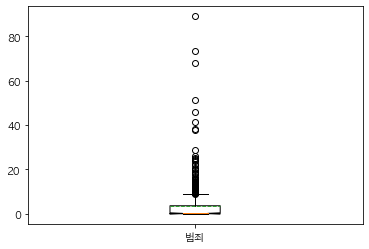

In [43]:
import matplotlib.pyplot as plt
plt.boxplot(x=[df.crim], notch=True, showmeans=True, 
           meanline=True, vert=True, labels=['범죄'])

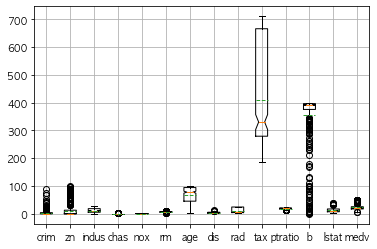

In [44]:
import matplotlib.pyplot as plt
# 모든 컬럼의 boxplot 그리기
plt.boxplot(x=[df[col] for col in df.columns], notch=True, showmeans=True, 
           meanline=True, vert=True,
            labels=df.columns.to_list())
plt.grid()

In [24]:
df.crim.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

In [27]:
df.crim.quantile(0.99)

41.37032999999997

In [28]:
df.zn.describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: zn, dtype: float64

In [29]:
X = df.iloc[:, :13]
y = df.iloc[:, 13]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.head())
print('-'*50)
print(X_test.head())

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
273  0.22188  20.0   6.96     1  0.464  7.691  51.8  4.3665    3  223   
185  0.06047   0.0   2.46     0  0.488  6.153  68.8  3.2797    3  193   
340  0.06151   0.0   5.19     0  0.515  5.968  58.5  4.8122    5  224   
316  0.31827   0.0   9.90     0  0.544  5.914  83.2  3.9986    4  304   
232  0.57529   0.0   6.20     0  0.507  8.337  73.3  3.8384    8  307   

     ptratio       b  lstat  
273     18.6  390.77   6.58  
185     17.8  387.11  13.15  
340     20.2  396.90   9.29  
316     18.4  390.70  18.33  
232     17.4  385.91   2.47  
--------------------------------------------------
        crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
80   0.04113  25.0   4.86     0  0.426  6.727   33.5  5.4007    4  281   
196  0.04011  80.0   1.52     0  0.404  7.287   34.1  7.3090    2  329   
144  2.77974   0.0  19.58     0  0.871  4.903   97.8  1.3459    5  403   
159  1.42502   0.0  19.58     0  0

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=13))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1)) # 회귀분석 출력층에는 activation func이 불필요

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,061
Trainable params: 1,061
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=200, batch_size=10)

Train on 379 samples
Epoch 1/200
379/379 [==============================] - 0s 813us/sample - loss: 667.2489
Epoch 2/200
379/379 [==============================] - 0s 137us/sample - loss: 139.2372
Epoch 3/200
379/379 [==============================] - 0s 138us/sample - loss: 105.5275
Epoch 4/200
379/379 [==============================] - 0s 160us/sample - loss: 91.5768
Epoch 5/200
379/379 [==============================] - 0s 137us/sample - loss: 84.0694
Epoch 6/200
379/379 [==============================] - 0s 135us/sample - loss: 79.8753
Epoch 7/200
379/379 [==============================] - 0s 135us/sample - loss: 78.2197
Epoch 8/200
379/379 [==============================] - 0s 137us/sample - loss: 77.5089
Epoch 9/200
379/379 [==============================] - 0s 144us/sample - loss: 75.7973
Epoch 10/200
379/379 [==============================] - 0s 135us/sample - loss: 74.3822
Epoch 11/200
379/379 [==============================] - 0s 136us/sample - loss: 71.9648
Epoch 12/200
379/

Epoch 92/200
379/379 [==============================] - 0s 189us/sample - loss: 27.6747
Epoch 93/200
379/379 [==============================] - 0s 158us/sample - loss: 27.0757
Epoch 94/200
379/379 [==============================] - 0s 159us/sample - loss: 27.1203
Epoch 95/200
379/379 [==============================] - 0s 156us/sample - loss: 29.0894
Epoch 96/200
379/379 [==============================] - 0s 135us/sample - loss: 27.2667
Epoch 97/200
379/379 [==============================] - 0s 131us/sample - loss: 27.9166
Epoch 98/200
379/379 [==============================] - 0s 131us/sample - loss: 25.6499
Epoch 99/200
379/379 [==============================] - 0s 131us/sample - loss: 26.6783
Epoch 100/200
379/379 [==============================] - 0s 133us/sample - loss: 25.0438
Epoch 101/200
379/379 [==============================] - 0s 140us/sample - loss: 26.7823
Epoch 102/200
379/379 [==============================] - 0s 140us/sample - loss: 25.6625
Epoch 103/200
379/379 [======

379/379 [==============================] - 0s 137us/sample - loss: 16.7353
Epoch 185/200
379/379 [==============================] - 0s 131us/sample - loss: 16.6496
Epoch 186/200
379/379 [==============================] - 0s 129us/sample - loss: 19.1802
Epoch 187/200
379/379 [==============================] - 0s 134us/sample - loss: 17.0269
Epoch 188/200
379/379 [==============================] - 0s 136us/sample - loss: 18.5580
Epoch 189/200
379/379 [==============================] - 0s 146us/sample - loss: 22.2584
Epoch 190/200
379/379 [==============================] - 0s 147us/sample - loss: 16.9653
Epoch 191/200
379/379 [==============================] - 0s 141us/sample - loss: 15.9380
Epoch 192/200
379/379 [==============================] - 0s 136us/sample - loss: 17.6115
Epoch 193/200
379/379 [==============================] - 0s 138us/sample - loss: 16.8652
Epoch 194/200
379/379 [==============================] - 0s 139us/sample - loss: 16.9999
Epoch 195/200
379/379 [============

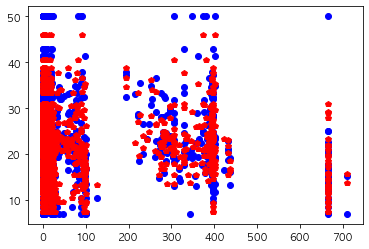

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X_test, y_test, 'bo')
plt.plot(X_test, model.predict(X_test), 'p', color='red')
plt.show()

In [47]:
model.predict(X_test)

array([[28.32587  ],
       [34.96148  ],
       [14.286063 ],
       [29.804003 ],
       [30.42801  ],
       [22.630407 ],
       [18.30405  ],
       [20.002386 ],
       [10.64648  ],
       [38.785503 ],
       [16.66979  ],
       [25.859203 ],
       [19.256796 ],
       [17.589197 ],
       [ 8.173229 ],
       [18.228891 ],
       [16.558727 ],
       [25.628588 ],
       [16.86138  ],
       [24.534185 ],
       [19.22204  ],
       [19.33616  ],
       [32.196922 ],
       [30.770329 ],
       [22.505238 ],
       [20.248592 ],
       [16.134842 ],
       [35.65157  ],
       [17.322603 ],
       [32.94941  ],
       [33.27149  ],
       [ 9.99314  ],
       [26.314928 ],
       [25.242853 ],
       [15.393953 ],
       [26.539013 ],
       [18.814493 ],
       [22.330439 ],
       [29.2653   ],
       [18.69437  ],
       [20.162098 ],
       [16.704039 ],
       [29.352266 ],
       [19.053522 ],
       [19.161373 ],
       [10.128994 ],
       [18.266626 ],
       [23.07

In [48]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred)))

4.317165538063116


# 딥러닝 이진분류

In [49]:
import pandas as pd

df = pd.read_csv(path+'pima-indians-diabetes.csv', header=0)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df = df.sample(frac=1)
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
46,1,146,56,0,0,29.7,0.564,29,0
547,4,131,68,21,166,33.1,0.160,28,0
442,4,117,64,27,120,33.2,0.230,24,0
271,2,108,62,32,56,25.2,0.128,21,0
736,0,126,86,27,120,27.4,0.515,21,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 46 to 125
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [52]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


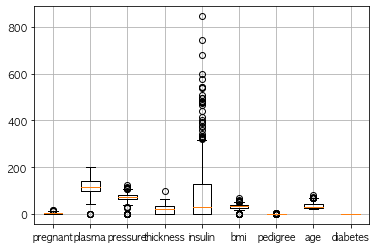

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.boxplot(x=[df[col] for col in df.columns], 
            labels=df.columns.to_list())
plt.grid()
plt.show()

# plt.boxplot(x=[df.crim], notch=True, showmeans=True, 
#            meanline=True, vert=True, labels=['범죄'])

In [56]:
X = df.iloc[:, :8]
y = df.iloc[:, 8]

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X_train.head())
print('-'*50)
print(X_test.head())

     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
602         1     124        74         36        0  27.8     0.100   30
283         7     161        86          0        0  30.4     0.165   47
117         5      78        48          0        0  33.7     0.654   25
365         5      99        54         28       83  34.0     0.499   30
115         4     146        92          0        0  31.2     0.539   61
--------------------------------------------------
     pregnant  plasma  pressure  thickness  insulin   bmi  pedigree  age
39          4     111        72         47      207  37.1     1.390   56
119         4      99        76         15       51  23.2     0.223   21
705         6      80        80         36        0  39.8     0.177   28
493         4     125        70         18      122  28.9     1.144   45
67          2     109        92          0        0  42.7     0.845   54


In [62]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=12, activation='relu', input_dim=8))
model.add(tf.keras.layers.Dense(units=8, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [63]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train, y_train, epochs=200, batch_size=10)

Train on 576 samples
Epoch 1/200
576/576 [==============================] - 0s 847us/sample - loss: 1.4861 - acc: 0.5764
Epoch 2/200
576/576 [==============================] - 0s 186us/sample - loss: 1.2076 - acc: 0.5538
Epoch 3/200
576/576 [==============================] - 0s 187us/sample - loss: 1.1611 - acc: 0.6146
Epoch 4/200
576/576 [==============================] - 0s 176us/sample - loss: 1.0639 - acc: 0.5938
Epoch 5/200
576/576 [==============================] - 0s 159us/sample - loss: 0.9894 - acc: 0.5885
Epoch 6/200
576/576 [==============================] - 0s 177us/sample - loss: 0.9107 - acc: 0.6128
Epoch 7/200
576/576 [==============================] - 0s 163us/sample - loss: 0.8605 - acc: 0.5938
Epoch 8/200
576/576 [==============================] - 0s 164us/sample - loss: 0.8174 - acc: 0.6181
Epoch 9/200
576/576 [==============================] - 0s 160us/sample - loss: 0.8276 - acc: 0.5920
Epoch 10/200
576/576 [==============================] - 0s 216us/sample - loss:

576/576 [==============================] - 0s 196us/sample - loss: 0.4965 - acc: 0.7344
Epoch 81/200
576/576 [==============================] - 0s 174us/sample - loss: 0.5184 - acc: 0.7326
Epoch 82/200
576/576 [==============================] - 0s 168us/sample - loss: 0.5242 - acc: 0.7448
Epoch 83/200
576/576 [==============================] - 0s 161us/sample - loss: 0.5239 - acc: 0.7378
Epoch 84/200
576/576 [==============================] - 0s 157us/sample - loss: 0.4990 - acc: 0.7535
Epoch 85/200
576/576 [==============================] - 0s 156us/sample - loss: 0.4789 - acc: 0.7778
Epoch 86/200
576/576 [==============================] - 0s 167us/sample - loss: 0.4942 - acc: 0.7500
Epoch 87/200
576/576 [==============================] - 0s 163us/sample - loss: 0.5157 - acc: 0.7569
Epoch 88/200
576/576 [==============================] - 0s 161us/sample - loss: 0.4882 - acc: 0.7500
Epoch 89/200
576/576 [==============================] - 0s 155us/sample - loss: 0.5222 - acc: 0.7517
Epo

576/576 [==============================] - 0s 166us/sample - loss: 0.4497 - acc: 0.7639
Epoch 161/200
576/576 [==============================] - 0s 156us/sample - loss: 0.4707 - acc: 0.7691
Epoch 162/200
576/576 [==============================] - 0s 160us/sample - loss: 0.4564 - acc: 0.7726
Epoch 163/200
576/576 [==============================] - 0s 156us/sample - loss: 0.4961 - acc: 0.7361
Epoch 164/200
576/576 [==============================] - 0s 157us/sample - loss: 0.4692 - acc: 0.7552
Epoch 165/200
576/576 [==============================] - 0s 158us/sample - loss: 0.4500 - acc: 0.7656
Epoch 166/200
576/576 [==============================] - 0s 156us/sample - loss: 0.4544 - acc: 0.7691
Epoch 167/200
576/576 [==============================] - 0s 157us/sample - loss: 0.4583 - acc: 0.7674
Epoch 168/200
576/576 [==============================] - 0s 156us/sample - loss: 0.4579 - acc: 0.7795
Epoch 169/200
576/576 [==============================] - 0s 156us/sample - loss: 0.5003 - acc: 0

In [66]:
print('Test Data Accuracy:', model.evaluate(X_test, y_test)[1])
#[0]은 손실값, [1]은 정확도

192/192 [==============================] - 0s 70us/sample - loss: 0.6580 - acc: 0.7083
Test Data Accuracy: 0.7083333


In [67]:
model.predict(X_test)

array([[6.80459738e-01],
       [5.18387854e-02],
       [3.42461228e-01],
       [2.79107451e-01],
       [1.56199932e-02],
       [2.00742483e-03],
       [9.46202397e-01],
       [3.87604475e-01],
       [1.20912760e-01],
       [3.47277284e-01],
       [4.07469273e-03],
       [1.39234364e-01],
       [6.72101974e-04],
       [5.82483351e-01],
       [3.30188990e-01],
       [8.41848373e-01],
       [3.46412003e-01],
       [1.15107000e-02],
       [5.52524209e-01],
       [9.64585185e-01],
       [2.82733202e-01],
       [1.18911266e-05],
       [6.16450608e-02],
       [1.05283558e-01],
       [6.80382371e-01],
       [7.39908218e-02],
       [1.34178311e-01],
       [5.26305377e-01],
       [7.60820806e-02],
       [7.21331477e-01],
       [3.08189273e-01],
       [6.63770556e-01],
       [3.74765515e-01],
       [2.66797006e-01],
       [6.63673460e-01],
       [6.99813128e-01],
       [3.58998299e-01],
       [5.70952892e-01],
       [1.81968212e-01],
       [9.76312459e-01],


In [68]:
model.predict(X_test)[0]

array([0.68045974], dtype=float32)

### 결과: 이진 분류이므로 class가 1이 될 확률을 보여준다. 즉, 위의 예시에는 0.68의 확률로 당뇨병에 걸렸을거라 예상된다.